# Intoduction to Statistical Group Comparisons??

This training module was developed by Dr. Kyle Roell, Alexis Payton, MS, and Dr. Julia E. Rager

Fall 2023

## Introduction to Training Module

This training module provides a brief introduction to some of the most commonly implemented statistics and associated visualizations used in exposure science, toxicology, and environmental health studies. This module first uploads an example dataset that is similar to the data used in the previous data organization training module, though includes some expanded subject information data to allow for more example statistical tests. Then, methods to evaluate data normality are presented, including visualization-based approaches using histograms and Q-Q plots as well as statistical-based approaches. Basic statistical tests are then presented, including the t-test, analysis of variance, regression modeling, chi-squared test, and Fischer’s exact test. These statistical tests are very simple, with more extensive examples and associated descriptions of statistical models in the proceeding applications-based training modules. CHANGE

### Script Preparations#### Cleaning the global environment

In [1]:
rm(list=ls())

#### Installing required R packages
If you already have these packages installed, you can skip this step, or you can run the below code which checks installation status for you

In [ ]:
if (!requireNamespace("tidyverse"))
  install.packages("tidyverse");
if (!requireNamespace("ggpubr"))
  install.packages("ggpubr");

#### Loading R packages required for this session

In [2]:
library(tidyverse) # all tidyverse packages, including dplyr and ggplot2
library(ggpubr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Set your working directory

In [ ]:
setwd("/filepath to where your input files are")

#### Importing example datasets

Let's read in our example dataset. Note that these data are similar to those used in the previous training module on data organization, except that demographic and chemical measurement data were previously merged, and a few additional columns of subject information/demographics were added to serve as more thorough examples of data for use in this training module.

In [3]:
# Loading data
full.data <- read.csv("Module3_4/Module3_4_FullDemoChemData.csv")

Let's view the top of the first 9 columns of data in this dataframe:

In [4]:
full.data[1:10,1:9]

,ID,BMI,BMIcat,MAge,MEdu,BW,GA,Smoker,Smoker3
,<int>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>
1,1,27.7,Overweight,22.99928,3,3180.058,34,NS,Never
2,2,26.8,Overweight,30.05142,3,3210.823,43,S,Never
3,3,33.2,Overweight,28.04660,3,3311.551,40,NS,Never
4,4,30.1,Overweight,34.81796,3,3266.844,32,S,Never
5,5,37.4,Overweight,42.68440,3,3664.088,35,NS,Never
6,6,33.3,Overweight,24.94960,3,3328.988,40,NS,Never
7,7,24.8,Overweight,29.54798,3,3061.949,30,NS,Never
8,8,16.9,Underweight,24.94954,3,3332.539,38,NS,Current
9,9,36.9,Overweight,33.58589,3,3260.482,39,NS,Never


These represent the subject information/demographic data, which include the following columns:
  
+ ID (subject number)
+ BMI (body mass index)
+ BMIcat (BMI <= 18.5 binned as "Underweight"; 18.5 < BMI <= 24.5 binned as "Normal"; BMI > 24.5 binned as "Overweight")
+ MAge (maternal age, years)
+ MEdu (maternal education, 1= "less than high school"; 2= "high school or some college"; 3= "college or greater")
+ BW (body weight, grams)
+ GA (gestational age, week)
+ Smoker ("NS" = non-smoker; "S" = smoker)
+ Smoker3 ("Never", "Former", or "Current" smoking status)

<br>
Let's now view the remaining columns (columns 10-15) in this dataframe:

In [5]:
full.data[1:10,10:15]

,DWAs,DWCd,DWCr,UAs,UCd,UCr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.426464,1.292941,51.67987,10.192695,0.7537104,42.60187
2,7.832384,1.798535,50.10409,11.815088,0.9789506,41.30757
3,7.516569,1.288461,48.74001,10.079057,0.1903262,36.47716
4,5.906656,2.075259,50.92745,8.719123,0.9364825,42.47987
5,7.181873,2.762643,55.16882,9.436559,1.4977829,47.78528
6,9.723429,3.054057,51.14812,11.589403,1.6645837,38.26386
7,6.268547,1.218410,52.08578,8.887948,0.6347667,39.45535
8,6.718448,1.414975,54.96740,9.304968,0.6658849,45.09987
9,9.074928,2.727755,55.72826,10.818153,1.6585757,42.58577


These columns represent the environmental exposure measures, including:
  
+ DWAs (drinking water arsenic levels in µg/L)
+ DWCd (drinking water cadmium levels in µg/L)
+ DWCr (drinking water chromium levels in µg/L)
+ UAs (urinary arsenic levels in µg/L)
+ UCd (urinary cadmium levels in µg/L)
+ UCr (urinary chromium levels in µg/L)


Now that the script is prepared and the data are uploaded, we can start running some basic statistical tests and visualizations of data trends. SEGUEWAY TO QUESTIONS

## Training Module's Environmental Health Questions 
This training module was specifically developed to answer the following environmental health questions:
1. Are there statistically significant differences in BMI between non-smokers and smokers?
2. Are there statistically significant differences in BMI between current, former, and people who have never smoked?
3. Is there a relationship between maternal BMI and birth weight?
4. Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight?
<br> <br>

### Assessing Normality
SOMETHING ABOUT THE FIRST QUESTION
When selecting the appropriate statistical tests to evaluate potential trends in your data, statistical test selection often relies upon whether or not the underlying data are normally distributed. Many statistical tests and methods that are commonly implemented in exposure science, toxicology, and environmental health research rely on assumptions of normality. Thus, one of the most common statistic tests to perform at the beginning of an analysis is a **test for normality**.As dicussed in the previous module, there are a few ways to evaluate the normality of a dataset:*First*, you can visually gage whether a dataset appears to be normally distributed through plots. For example, plotting data using histograms, densities, or Q-Q plots can graphically help inform if a variable's values appear to be normally distributed or not.*Second*, you can evaluate normality using statistical tests, such as the **Kolmogorov-Smirnov (K-S) test** and **Shapiro-Wilk test**. When using these tests and interpreting their results, it is important to remember that the null hypothesis is that the sample distribution is normal, and a significant p-value means the distribution is non-normal.<br>

Let's start with the first approach, based on data visualizations. Here, let's begin with a [histogram](https://en.wikipedia.org/wiki/Histogram) to view the distribution of BMI data, as an example.

WORDS ABOUT GGPUBR For further documentation on `geom_smooth()`, click [here](https://www.sharpsightlabs.com/blog/geom_smooth/).

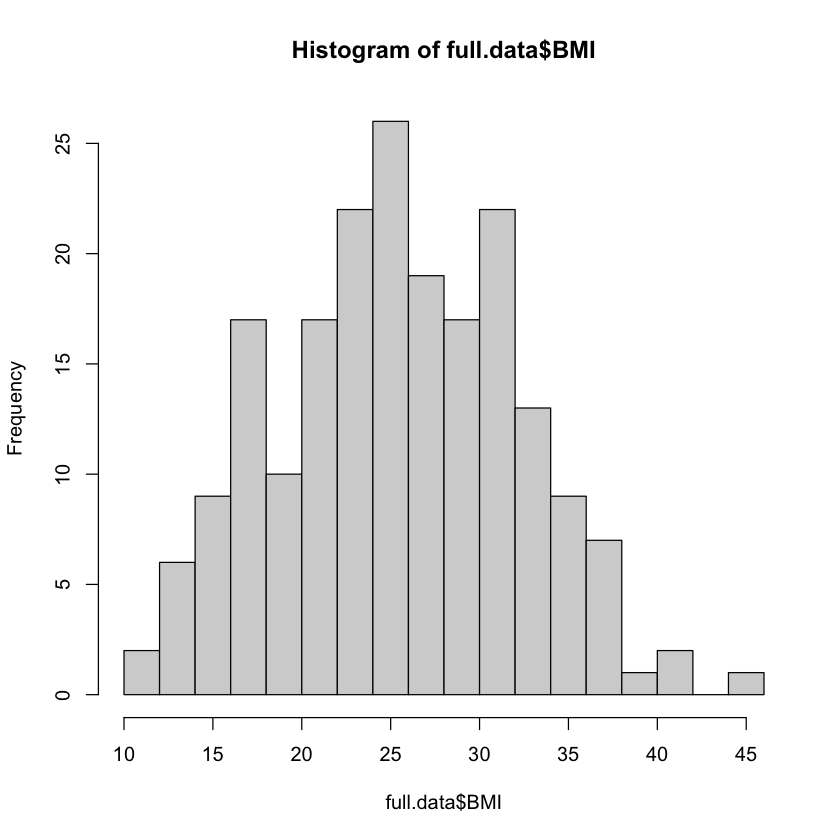

In [6]:
hist(full.data$BMI, breaks = 20)

Let's also view the [Q–Q (quantile-quantile) plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) using the `ggqqplot` function from the `ggpubr` package

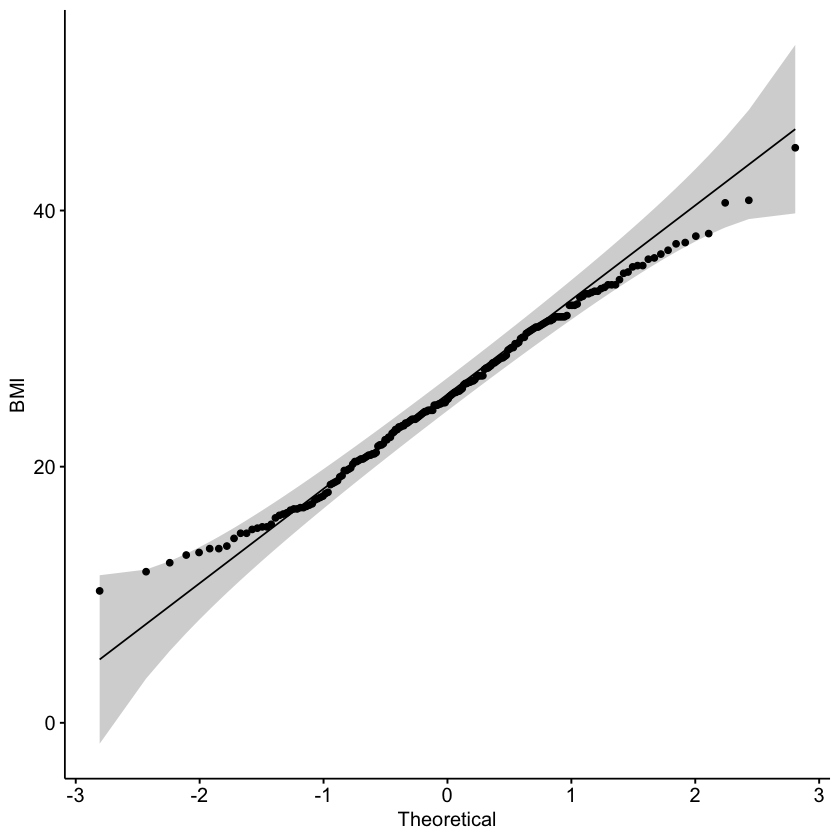

In [19]:
ggqqplot(full.data$BMI, ylab = "BMI")

From these visualizations, the BMI variable appears to be normally distributed, with data centered in the middle and spreading with a distribution on both the lower and upper sides that follow typical normal data distributions.

<br>

Let's now implement the second approach, based on statistical tests for normality. Here, let's use the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) as an example, again looking at the BMI data. 

In [8]:
shapiro.test(full.data$BMI)


	Shapiro-Wilk normality test

data:  full.data$BMI
W = 0.99232, p-value = 0.3773


This test resulted in a p-value of 0.3773, so cannot reject the null hypothesis (that data are normally distributed). This means that we can assume that these data are normally distributed.

## Two-Group Visualizations and Statistical Comparisons using the T-Test
T-tests are commonly used to test for a significant difference between the means of two groups in normally distributed data. In this example, we will be comparing BMI measures between two groups: smokers vs. non-smokers. EXPLICITLY PUT QUESTION HERE
We will specifically be implementing a two sample t-test (or independent samples t-test).

Let’s first visualize the BMI data across these two groups using boxplots, for this example:

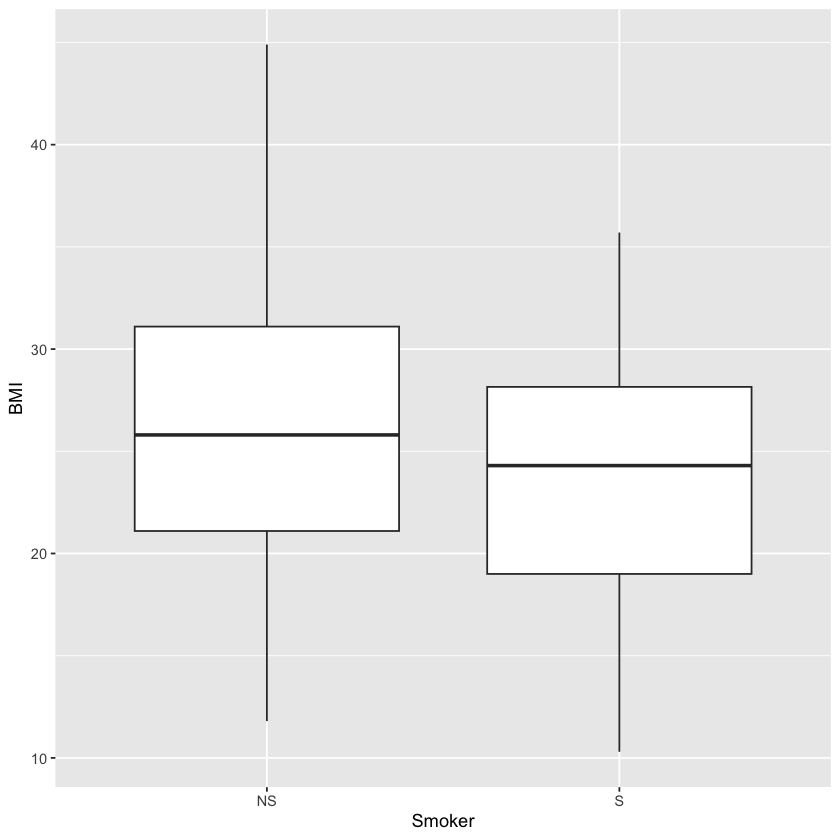

In [13]:
ggplot(data = full.data, aes(x = Smoker, y = BMI)) + 
  # plots the boxplot
  geom_boxplot(aes(group = Smoker))

From this plot, it looks like non-smokers (labeled 0) *may* have significantly higher BMI than smokers (labeled 1), though we need statistical evaluation of these data to more thoroughly evaluate this potential data trend.It is easy to perform a t-test on these data using the `t.test` function from the base R stats package:

In [11]:
t.test(data = full.data, BMI ~ Smoker)


	Welch Two Sample t-test

data:  BMI by Smoker
t = 2.5372, df = 80.362, p-value = 0.01311
alternative hypothesis: true difference in means between group NS and group S is not equal to 0
95 percent confidence interval:
 0.583061 4.823447
sample estimates:
mean in group NS  mean in group S 
        26.11176         23.40851 


*With this, we can answer **Environmental Health Question 1***: Are there statistically significant differences in BMI between non-smokers and smokers?

**Answer**:From this statistical output, we can see that the overall mean BMI in group "NS" (non-smokers) is ~26, and the overall mean BMI in group "S" (smokers) is ~23. We can also see that the resulting p-value comparison between the means of these two groups is, indeed, significant (p=0.0125), meaning that the means across these groups are significantly different (i.e., are not equal).

<br>
It's also helpful to save these results into a variable within the R global environment, which then allows us to access specific output values and extract them more easily for our records. For example, we can run the following to specifically extract the resulting p-value from this test:

In [12]:
ttest.res <- t.test(data = full.data, BMI ~ Smoker) # making a list in the R global environment with the statistical results
ttest.res$p.value # pulling the p-value

[1] 0.01310998

<br> <br>

## Three-Group Visualizations and Statistical Comparisons using	an ANOVA
Analysis of Variance (ANOVA) is a statistical method that can be used to compare means across three or more groups in normally distributed data. To demonstrate an ANOVA test on this dataset, let's evaluate BMI distributions across current vs. former vs. never smokers (using the 'Smoker3' variable from our dataset).

Let's again, start by viewing these data distributions using a boxplot:

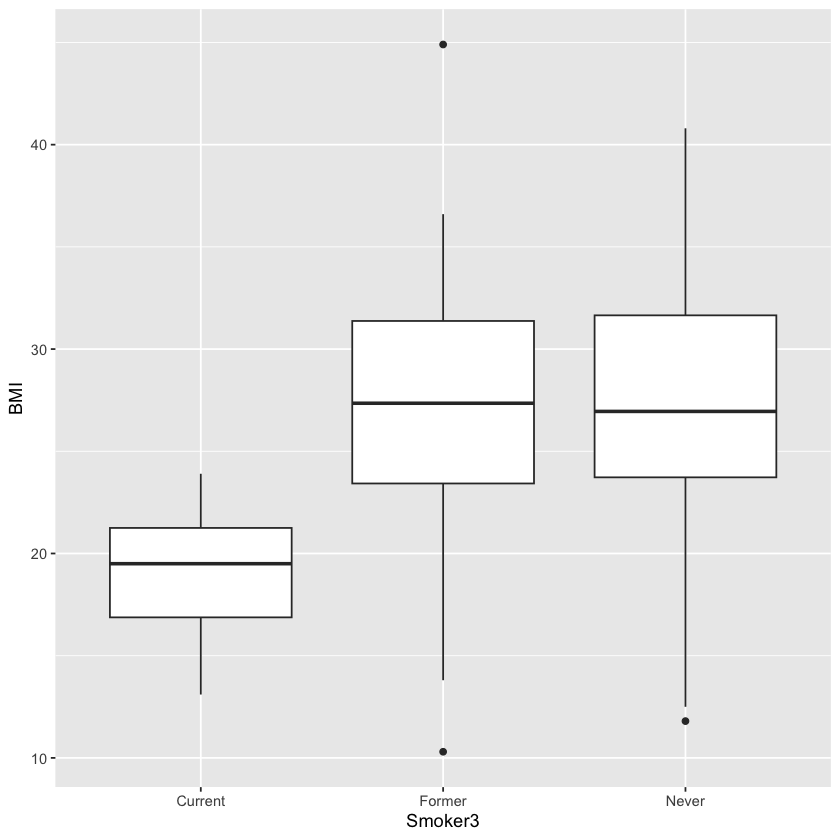

In [15]:
ggplot(data = full.data, aes(x = Smoker3, y = BMI)) + 
  # plots the boxplot
  geom_boxplot(aes(group = Smoker3))

From this cursory review of the data, it looks like the current smokers likely demonstrate significantly different BMI measures than the former and never smokers, though we need statistical tests to verify this potential trend. We also require statistical tests to evaluate potential differences (or lack of differences) between former and never smokers.

Let’s now run the ANOVA to compare BMI between smoking groups, using the `aov` function to fit an ANOVA model:

In [16]:
aov(data = full.data, BMI ~ Smoker3)

Call:
   aov(formula = BMI ~ Smoker3, data = full.data)

Terms:
                 Smoker3 Residuals
Sum of Squares  2046.713  6817.786
Deg. of Freedom        2       197

Residual standard error: 5.882861
Estimated effects may be unbalanced

We need to extract the typical ANOVA results table using either the `summary` or `anova` function on the resulting fitted object

In [18]:
anova(aov(data = full.data, BMI ~ Smoker3))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Smoker3,2,2046.713,1023.35658,29.5699,5.887528e-12
Residuals,197,6817.786,34.60805,NA,NA


*With this, we can answer **Environmental Health Question 2***: Are there statistically significant differences in BMI between current, former, and people who have never smoked?

**Answer**: From this ANOVA output table, we can conclude that the group means across all three groups are not equal given that the p value, written as Pr(>F) is significant. ADD POST HOC TESTS??

<br>## Regression Modeling and Visualization: Linear and Logistic RegressionsRegression modeling aims to find a relationship between a dependent variable (or outcome, response, y) and an independent variable (or predictor, explanatory variable, x). There are many forms of regression analysis, but here we will focus on two: linear regression and logistic regression.In brief, **linear regression** is generally used when you have a continuous dependent variable and there is assumed to be some sort of linear relationship between the dependent and independent variables. Conversely, **logistic regression** is often used when the dependent variable is dichotomous.Let's first run through an example linear regression model to answer **Environmental Health Question 3**: Is there a relationship between maternal BMI and birth weight?<br>### Linear RegressionWe will first visualize the data and a run simple correlation analysis to evaluate whether these data are generally correlated. Then, we will run a linear regression to evaluate the relationship between these variables in more detail. 


Plotting the variables against one another and adding a linear regression line using the functio `ggscatter` from the `ggpubr` package..

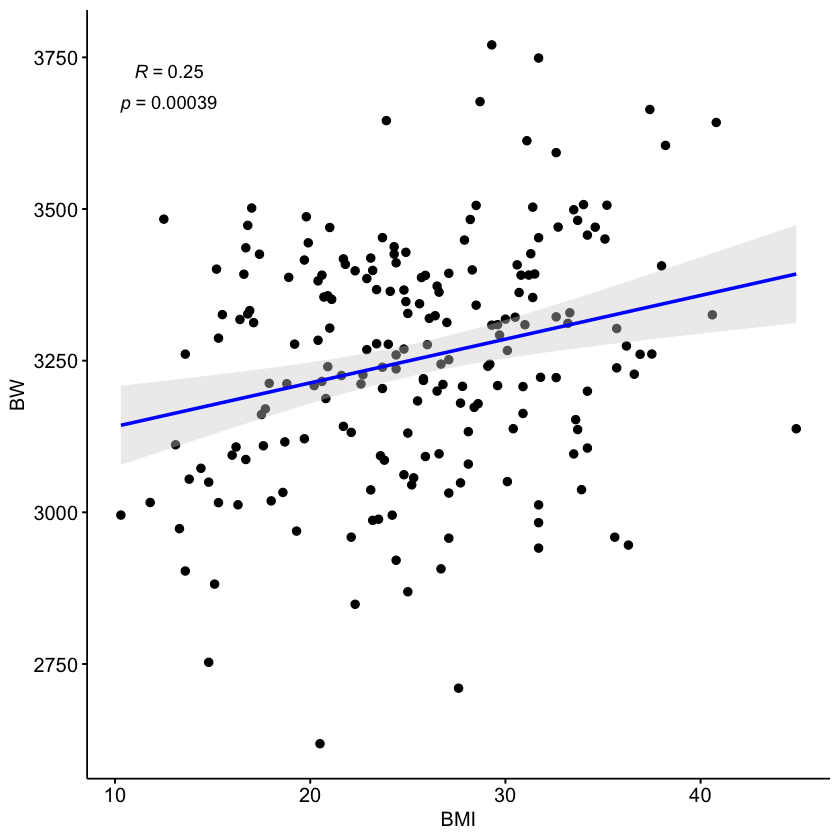

In [23]:
ggscatter(full.data, x = "BMI", y = "BW", 
          # Adding a linear line with 95% condfidence intervals as the shaded region
          add = "reg.line", conf.int = TRUE, 
          # Customize reg. line
          add.params = list(color = "blue", fill = "lightgray"), 
          # Adding Pearson's correlation coefficient
          cor.coef = TRUE, cor.method = "pearson", cor.coeff.args = list(label.sep = "\n")) 

Running a basic collection analyses between these two variables using the `cor.test` function to extract the Pearson's correlation coefficient and p-value:

In [16]:
cor.res <- cor.test(full.data$BW, full.data$BMI)
cor.res$estimate
cor.res$p.value

cor 
0.2485164

[1] 0.0003876464

Together, it looks like there may be a association between BW and BMI, based on these correlation results, demonstrating a significant p-value of 0.0004.

To test this further, let’s run a linear regression analysis using the `lm` function, using BMI (X) as the independent variable and BW as the dependent variable (Y):

In [23]:
lm.res <- lm(data = full.data, BW ~ BMI)
summary(lm.res) #viewing the results summary


Call:
lm(formula = BW ~ BMI, data = full.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-598.39 -116.72    8.11  136.54  490.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3069.201     52.576   58.38  < 2e-16 ***
BMI            7.208      1.997    3.61 0.000388 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 188 on 198 degrees of freedom
Multiple R-squared:  0.06176,	Adjusted R-squared:  0.05702 
F-statistic: 13.03 on 1 and 198 DF,  p-value: 0.0003876


*With this, we can answer **Environmental Health Question 3***: Is there a relationship between maternal BMI and birth weight?

**Answer**: Not only is there a slight positive correlation between maternal BMI and BW as indicated by ~0.25 correlation coefficient, this linear relationship is significant due to the p-value being ~0.0004. 

Additionally, we can also derive confidence intervals for the BMI estimate using:

In [24]:
confint(lm.res)["BMI",]

2.5 %    97.5 % 
 3.270873 11.145740

Notice that the r-squared (R^2) value in regression output is the squared value of the previously calculated correlation coefficient (R)

In [25]:
sqrt(summary(lm.res)$r.squared)

[1] 0.2485164

In epidemiological studies, the potential influence of confounders is considered by including important covariates within the final regression model. Let's go ahead and investigate **Environmental Health Question 4**: Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight? We can do that by adding those variables to the linear model.

In [7]:
summary(lm(data = full.data, BW ~ BMI + MAge + GA))


Call:
lm(formula = BW ~ BMI + MAge + GA, data = full.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-454.04 -111.24    5.79  116.46  488.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2247.995    117.946  19.060  < 2e-16 ***
BMI            6.237      1.774   3.515 0.000547 ***
MAge           4.269      1.887   2.263 0.024752 *  
GA            19.612      2.656   7.385 4.28e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 165.5 on 196 degrees of freedom
Multiple R-squared:  0.2805,	Adjusted R-squared:  0.2695 
F-statistic: 25.47 on 3 and 196 DF,  p-value: 5.884e-14


*With this, we can answer **Environmental Health Question 4***: Are maternal age and gestational age considered to be potential covariates in the relationship between maternal BMI and birth weight?

**Answer**: BMI is still significantly associated with BW and the included covariates are also shown to be significantly related to birth weight in this model.

Let's further visualize these regression modeling results by adding a regression line to the original scatterplot:

In [28]:
dat$lm

[1] 3185.737 3386.735 3359.256 3211.931 3349.874 3346.660 3117.156 3205.153
  [9] 3386.365 3237.469 3200.184 3076.220 3308.612 3088.643 3122.360 3076.173
 [17] 3397.809 3340.294 3267.353 3248.949 3225.544 3409.878 3088.907 3319.244
 [25] 3288.536 3316.292 3206.977 3363.309 3220.709 3172.695 3217.766 3172.189
 [33] 3337.478 3165.532 3187.237 3207.818 3225.380 3420.051 3296.189 3356.290
 [41] 3095.551 3376.868 3271.770 3246.274 3331.355 3067.765 3173.699 3218.751
 [49] 3064.697 3311.843 3269.320 3369.366 3347.229 3437.913 3327.066 3115.553
 [57] 3253.451 3303.816 3335.068 3369.556 3080.833 3228.711 3159.922 3409.165
 [65] 3359.510 3100.821 3327.834 3375.123 3282.100 3349.421 3217.617 3173.934
 [73] 3380.748 3300.112 3148.878 3335.855 3349.285 3021.109 3305.769 3395.583
 [81] 3098.979 3256.418 3289.710 3260.273 3301.415 3201.159 3134.387 3378.686
 [89] 3391.824 3193.775 3267.752 3171.953 3339.973 3390.505 3231.766 3254.052
 [97] 3323.748 3298.395 3193.189 3282.609 3136.339 3122.616 3303.672 3327.389
[105] 3095.020 3286.524 3240.800 3326.392 3314.347 3257.522 3423.084 3197.345
[113] 3273.425 3102.695 3451.342 3189.089 3369.168 3175.217 3334.716 3160.797
[121] 3186.600 3355.352 3102.841 3368.092 3367.353 3348.679 3276.211 3262.197
[129] 3382.229 3153.068 3249.393 3354.513 3134.145 3164.503 3357.224 3072.620
[137] 3052.578 3048.042 3129.358 3175.657 3236.578 3348.986 3205.142 3372.544
[145] 3357.583 3158.893 3279.902 3323.331 3288.805 3267.054 3104.053 3339.445
[153] 3240.010 3247.833 3367.717 3287.537 3101.520 3285.613 3356.899 3125.741
[161] 3193.467 3148.914 3293.671 3347.835 3248.558 3316.431 3137.991 3141.122
[169] 3073.997 3204.820 3131.378 3299.389 3197.769 3435.361 3228.366 3323.517
[177] 3210.259 3317.502 3107.213 3125.480 3051.606 3122.143 3415.589 3320.620
[185] 3297.539 3109.057 3311.017 3085.360 3318.181 3466.185 3169.879 3149.134
[193] 3275.202 3363.752 3299.203 3151.862 3312.118 3274.392 3361.496 3347.281

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘span’ will be disregarded”


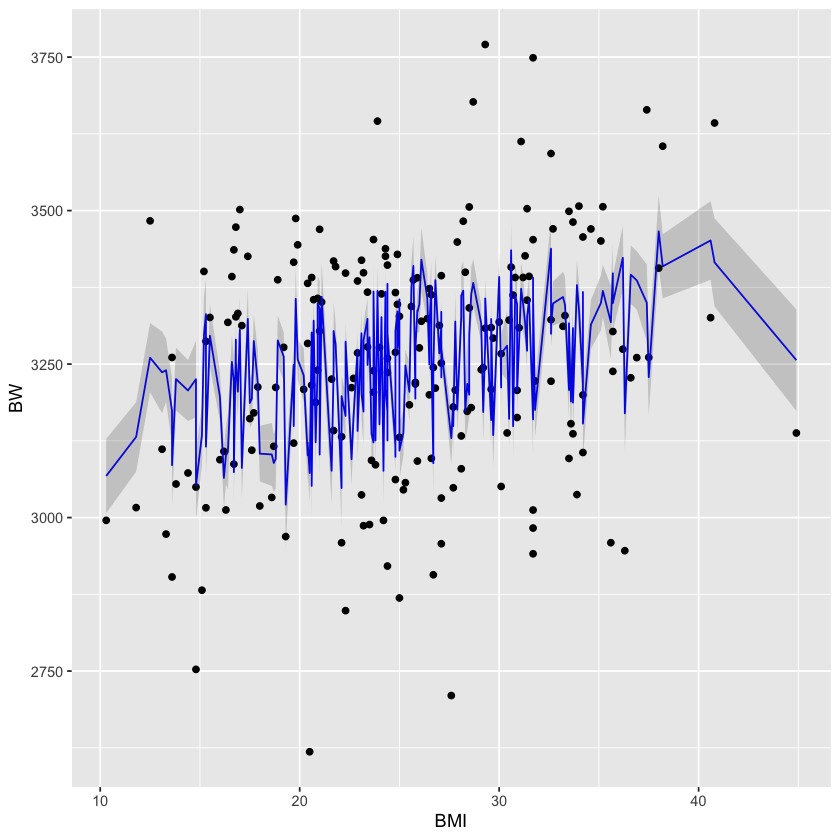

In [25]:
fit = predict(lm(BW ~ BMI + MAge + GA, data=full.data, span=0.5), se=T)
#tem = predict(loess(BW~ BMI,data=mtcars), se=T)

dat = full.data
dat$lm = fit$fit
dat$ymax  = fit$fit + fit$se.fit * abs(qnorm((1-0.95)/2))
dat$ymin  = fit$fit - fit$se.fit * abs(qnorm((1-0.95)/2))

ggplot(dat, aes(x = BMI, y = BW)) + 
  geom_point() + 
  geom_line(aes(y=lm), color='blue') +
  geom_ribbon(aes(ymin=ymin, ymax=ymax), alpha=0.2)

In [ ]:
ggplot(full.data, aes(x = BMI, y = BW)) + 
  geom_point() + 
  # adding a linear line with 95% condfidence intervals as the shaded region, formula: BW = BMI
  geom_smooth(method = 'lm') + 
  geom_smooth(method = 'lm', formula = , color = 'red')